In [139]:
### Steps Involved
##1. Reading and understanding data
##2. Prepared the data for modelling(train-test,rescalling etc.)
##3. Training the model
##4. Residual Analysis
##5. Prediction and evaluation

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [141]:
import os
os.chdir("C:\\Users\\kaust\\OneDrive\\Desktop\\upgrad\\Bike Sharing Assignment")

In [142]:
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [143]:
bike_data.shape

(730, 16)

In [144]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [145]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Figure size 2880x1080 with 0 Axes>

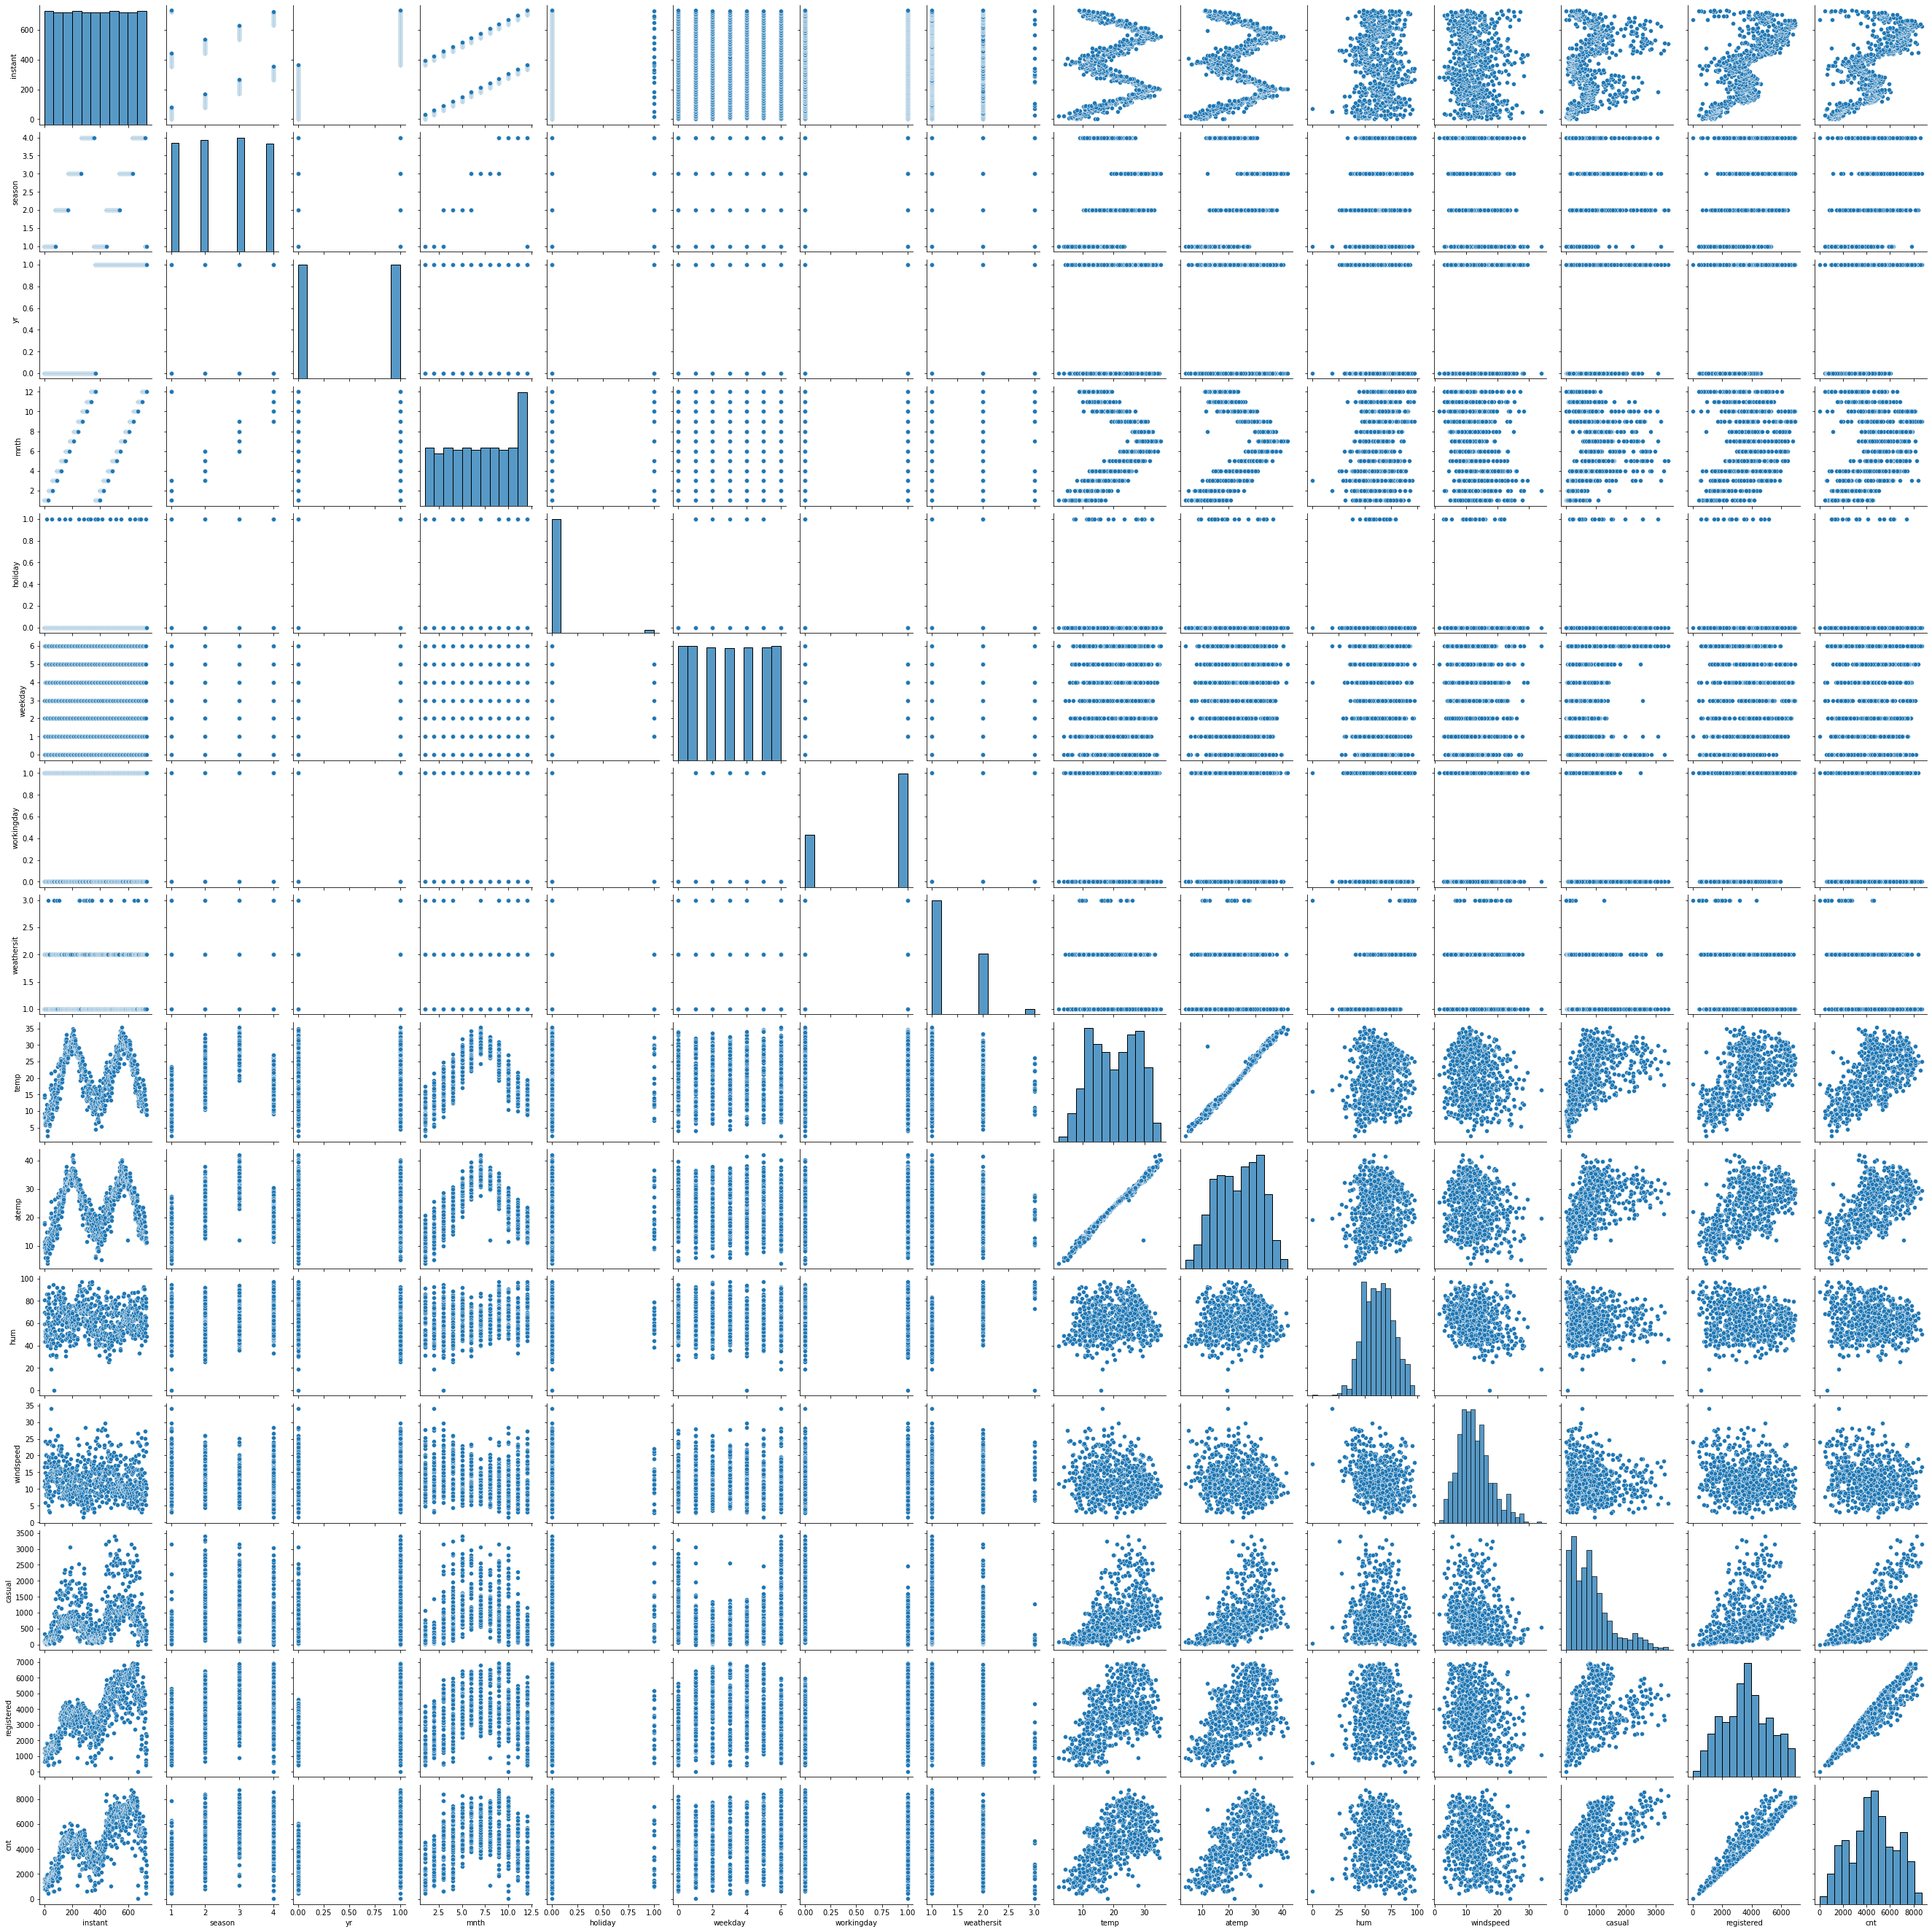

In [146]:
# Visualize the numerical variable
plt.figure(figsize=(40,15))
sns.pairplot(bike_data)
plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

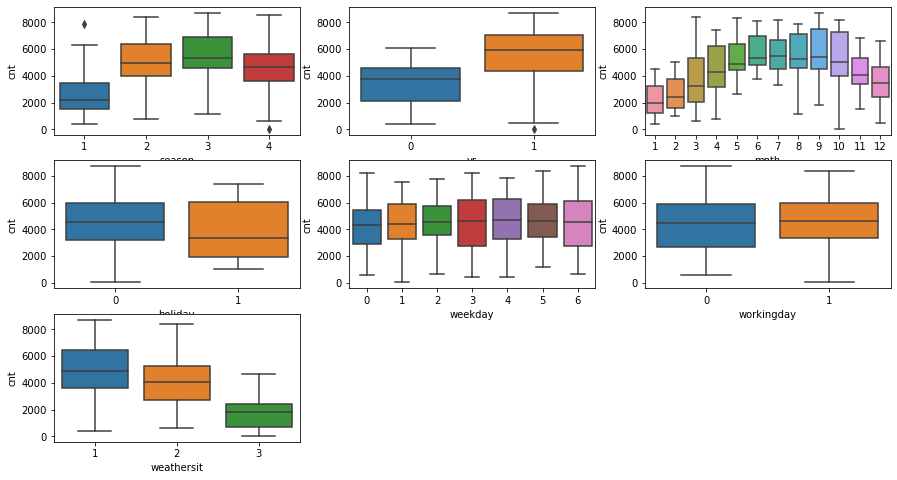

In [147]:
## Visualize the categorical variable
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.boxplot(x='season',y ='cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y ='cnt', data=bike_data)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y ='cnt', data=bike_data)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y ='cnt', data=bike_data)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y ='cnt',data=bike_data)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y ='cnt', data=bike_data)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y ='cnt',data=bike_data)

In [148]:
#Create dummy variables for season
status = pd.get_dummies(bike_data['season'],drop_first=True)
bike_data = pd.concat([bike_data,status],axis=1)
bike_data = bike_data.drop('season',axis=1)
bike_data.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,2,3,4
0,1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [149]:
# Renaming dummy columns for better understanding
bike_data.rename(columns={2:'summer', 3:'fall', 4:'winter'}, inplace=True)
bike_data.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'summer', 'fall', 'winter'],
      dtype='object')

In [150]:
#Create dummy variables for holiday
status = pd.get_dummies(bike_data['holiday'],drop_first=True)
bike_data = pd.concat([bike_data,status],axis=1)
bike_data = bike_data.drop('holiday',axis=1)
bike_data.head()

,instant,dteday,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter,1
0,1,01-01-2018,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,0
1,2,02-01-2018,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,0
2,3,03-01-2018,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0
3,4,04-01-2018,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0
4,5,05-01-2018,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0


In [151]:
# Renaming dummy columns for better understanding
bike_data.rename(columns={1:'holiday'}, inplace=True)
bike_data.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'summer', 'fall', 'winter', 'holiday'],
      dtype='object')

In [152]:
#Create dummy variables for weekday
status = pd.get_dummies(bike_data['weekday'],drop_first=True)
bike_data = pd.concat([bike_data,status],axis=1)
bike_data = bike_data.drop('weekday',axis=1)
bike_data.head()

,instant,dteday,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,...,summer,fall,winter,holiday,1,2,3,4,5,6
0,1,01-01-2018,0,1,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,0,1,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,1,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,1,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,1,0,0,0


In [153]:
# Renaming dummy columns for better understanding
bike_data.rename(columns={1:'Monday',2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}, inplace=True)
bike_data.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'summer',
       'fall', 'winter', 'holiday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday'],
      dtype='object')

In [154]:
#Create dummy variables for weathersit
status = pd.get_dummies(bike_data['weathersit'],drop_first=True)
bike_data = pd.concat([bike_data,status],axis=1)
bike_data = bike_data.drop('weathersit',axis=1)
bike_data.head()

,instant,dteday,yr,mnth,workingday,temp,atemp,hum,windspeed,casual,...,winter,holiday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,2,3
0,1,01-01-2018,0,1,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,1,1,0
1,2,02-01-2018,0,1,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,0,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,1,0,0,0,0,0,0
4,5,05-01-2018,0,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,1,0,0,0,0,0


In [155]:
# Renaming dummy columns for better understanding
bike_data.rename(columns={2:'WS2', 3:'WS3',}, inplace=True)
bike_data.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'summer', 'fall', 'winter',
       'holiday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'WS2', 'WS3'],
      dtype='object')

In [156]:
#Create dummy variables for mnth
status = pd.get_dummies(bike_data['mnth'],drop_first=True)
bike_data = pd.concat([bike_data,status],axis=1)
bike_data = bike_data.drop('mnth',axis=1)
bike_data.head()

,instant,dteday,yr,workingday,temp,atemp,hum,windspeed,casual,registered,...,3,4,5,6,7,8,9,10,11,12
0,1,01-01-2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [157]:
# Renaming dummy columns for better understanding
bike_data.rename(columns={2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)
bike_data.columns

Index(['instant', 'dteday', 'yr', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'summer', 'fall', 'winter',
       'holiday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'WS2', 'WS3', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [158]:
 bike_data = bike_data.drop(['instant','dteday'], axis=1)

In [159]:
 bike_data = bike_data.drop(['casual','registered'], axis=1)

In [160]:
bike_data.columns

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'holiday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'WS2', 'WS3', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

## Splitting into test and training data

In [161]:
df_train, df_test = train_test_split(bike_data, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Rescaling the features

In [162]:
#1. Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#2. fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [163]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Training a model

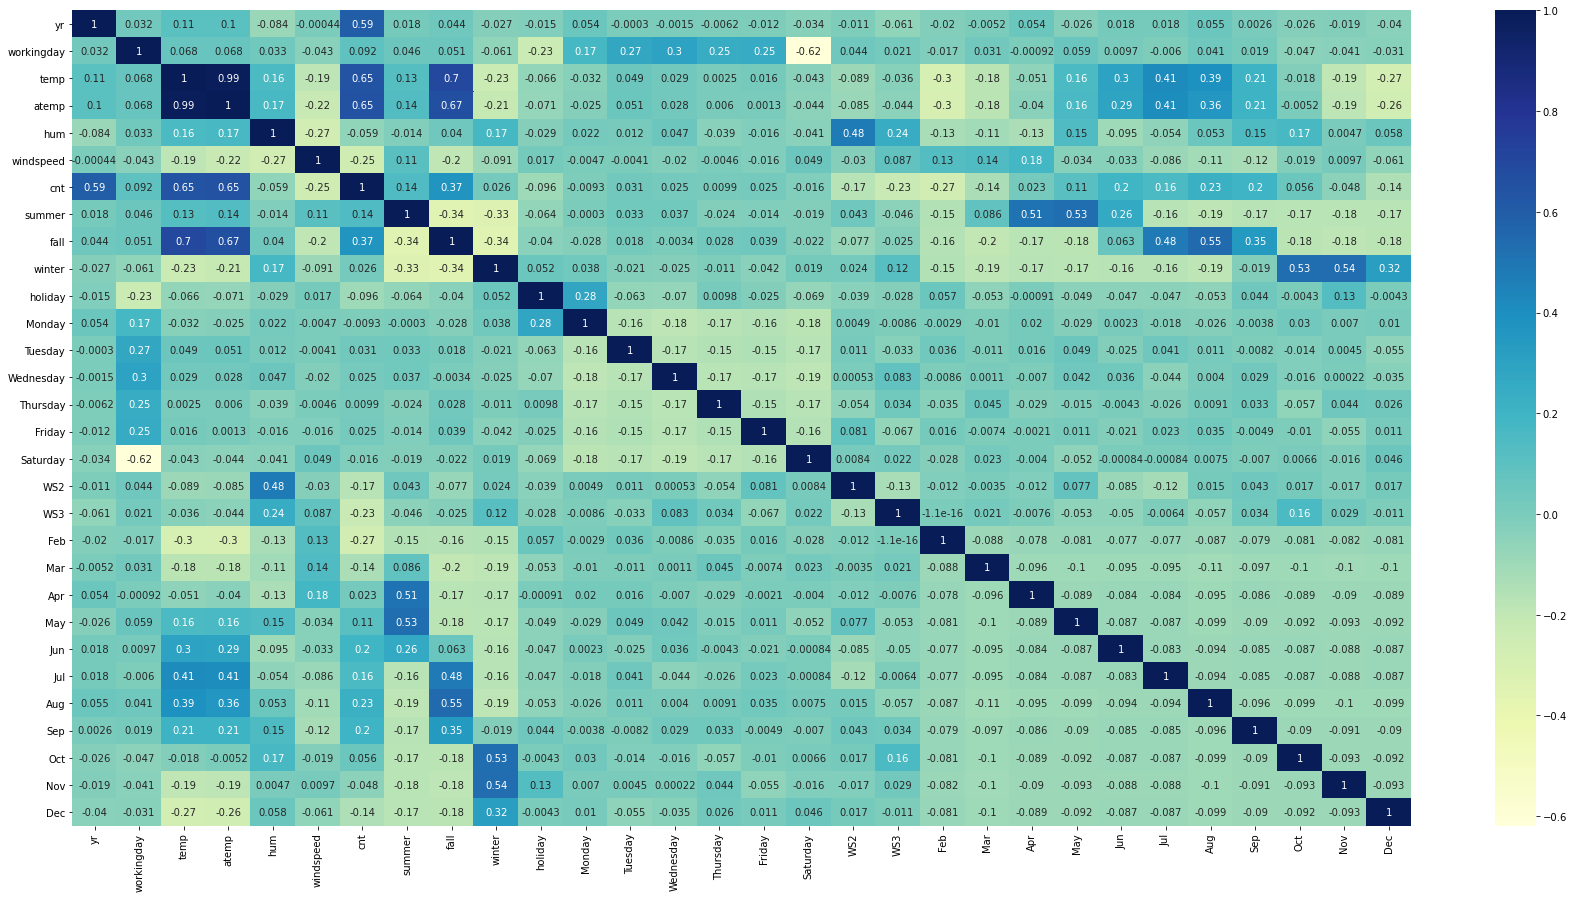

In [164]:
# heatmap
plt.figure(figsize = (30,15))
sns.heatmap(df_train.corr(), annot= True, cmap="YlGnBu")
plt.show()

In [165]:
df_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [166]:
## X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [167]:
X_train.columns

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'holiday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'WS2', 'WS3', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [168]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [169]:
import statsmodels.api as sm

# Build a model with all variables
X_train_sm = sm.add_constant(X_train)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.81e-180
Time:                        16:04:54   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1758      0.030      5.774      0.000       0.116       0.236
yr             0.2325      0.008     28.794      0.000       0.217       0.248
workingday     0.0438      0.009      4.666      0.000       0.025       0.062
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
summer         0.0877      0.024      3.713      0.000       0.041       0.134
fall           0.0454      0.030      1.511      0.131      -0.014       0.104
winter         0.1524      0.026      5.866      0.000       0.101       0.203
holiday       -0.0416      0.024     -1.758      0.079      -0.088       0.005
Monday        -0.0101      0.010     -1.033      0.302      -0.029       0.009
Tuesday       -0.0069      0.011     -0.616      0.538      -0.029       0.015
Wednesday      0.0057      0.011      0.538      0.591      -0.015       0.026
Thursday       0.0018      0.011      0.168      0.867      -0.020       0.023
Friday         0.0116      0.011      1.029      0.304      -0.011       0.034
Saturday       0.0542      0.015      3.729      0.000       0.026       0.083
WS2           -0.0595      0.010     -5.701      0.000      -0.080      -0.039
WS3           -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Feb            0.0307      0.021      1.489      0.137      -0.010       0.071
Mar            0.0646      0.022      2.886      0.004       0.021       0.109
Apr            0.0631      0.034      1.876      0.061      -0.003       0.129
May            0.0886      0.036      2.446      0.015       0.017       0.160
Jun            0.0691      0.039      1.776      0.076      -0.007       0.145
Jul            0.0304      0.044      0.692      0.489      -0.056       0.117
Aug            0.0853      0.042      2.038      0.042       0.003       0.168
Sep            0.1498      0.037      4.006      0.000       0.076       0.223
Oct            0.0708      0.035      2.050      0.041       0.003       0.139
Nov            0.0232      0.033      0.707      0.480      -0.041       0.088
Dec            0.0188      0.027      0.708      0.479      -0.033       0.071
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     1.22e+16
==============================================================================

N

In [170]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Friday,inf
9,holiday,inf
1,workingday,inf
13,Thursday,inf
12,Wednesday,inf
10,Monday,inf
11,Tuesday,inf
2,temp,446.42
3,atemp,383.20
4,hum,20.80


In [171]:
X = X_train.drop('Friday',axis=1)

In [172]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.81e-180
Time:                        16:04:54   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1758      0.030      5.774      0.000       0.116       0.236
yr             0.2325      0.008     28.794      0.000       0.217       0.248
workingday     0.0553      0.015      3.606      0.000       0.025       0.085
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
summer         0.0877      0.024      3.713      0.000       0.041       0.134
fall           0.0454      0.030      1.511      0.131      -0.014       0.104
winter         0.1524      0.026      5.866      0.000       0.101       0.203
holiday       -0.0301      0.030     -0.989      0.323      -0.090       0.030
Monday        -0.0216      0.015     -1.401      0.162      -0.052       0.009
Tuesday       -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wednesday     -0.0059      0.015     -0.394      0.694      -0.035       0.023
Thursday      -0.0097      0.016     -0.623      0.534      -0.040       0.021
Saturday       0.0542      0.015      3.729      0.000       0.026       0.083
WS2           -0.0595      0.010     -5.701      0.000      -0.080      -0.039
WS3           -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Feb            0.0307      0.021      1.489      0.137      -0.010       0.071
Mar            0.0646      0.022      2.886      0.004       0.021       0.109
Apr            0.0631      0.034      1.876      0.061      -0.003       0.129
May            0.0886      0.036      2.446      0.015       0.017       0.160
Jun            0.0691      0.039      1.776      0.076      -0.007       0.145
Jul            0.0304      0.044      0.692      0.489      -0.056       0.117
Aug            0.0853      0.042      2.038      0.042       0.003       0.168
Sep            0.1498      0.037      4.006      0.000       0.076       0.223
Oct            0.0708      0.035      2.050      0.041       0.003       0.139
Nov            0.0232      0.033      0.707      0.480      -0.041       0.088
Dec            0.0188      0.027      0.708      0.479      -0.033       0.071
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                         92.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [173]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,446.42
3,atemp,383.20
4,hum,20.80
7,fall,15.37
23,Aug,10.92
8,winter,10.83
22,Jul,9.54
1,workingday,9.47
6,summer,8.94
21,Jun,7.43


In [174]:
X = X.drop('atemp',axis=1)

In [175]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          3.00e-181
Time:                        16:04:55   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1763      0.030      5.797      0.000       0.117       0.236
yr             0.2324      0.008     28.819      0.000       0.217       0.248
workingday     0.0548      0.015      3.588      0.000       0.025       0.085
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
summer         0.0878      0.024      3.721      0.000       0.041       0.134
fall           0.0448      0.030      1.496      0.135      -0.014       0.104
winter         0.1525      0.026      5.873      0.000       0.101       0.203
holiday       -0.0313      0.030     -1.035      0.301      -0.091       0.028
Monday        -0.0209      0.015     -1.365      0.173      -0.051       0.009
Tuesday       -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wednesday     -0.0055      0.015     -0.368      0.713      -0.035       0.024
Thursday      -0.0091      0.016     -0.588      0.557      -0.040       0.021
Saturday       0.0542      0.015      3.732      0.000       0.026       0.083
WS2           -0.0596      0.010     -5.709      0.000      -0.080      -0.039
WS3           -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Feb            0.0309      0.021      1.497      0.135      -0.010       0.071
Mar            0.0646      0.022      2.888      0.004       0.021       0.109
Apr            0.0633      0.034      1.885      0.060      -0.003       0.129
May            0.0880      0.036      2.433      0.015       0.017       0.159
Jun            0.0679      0.039      1.752      0.080      -0.008       0.144
Jul            0.0295      0.044      0.672      0.502      -0.057       0.116
Aug            0.0837      0.042      2.009      0.045       0.002       0.166
Sep            0.1493      0.037      3.997      0.000       0.076       0.223
Oct            0.0709      0.034      2.055      0.040       0.003       0.139
Nov            0.0234      0.033      0.714      0.476      -0.041       0.088
Dec            0.0190      0.026      0.718      0.473      -0.033       0.071
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,46.87
3,hum,20.66
6,fall,15.35
7,winter,10.83
22,Aug,10.83
21,Jul,9.52
1,workingday,9.43
5,summer,8.94
20,Jun,7.40
23,Sep,7.28


In [177]:
X = X.drop('fall',axis=1)

In [178]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          8.68e-182
Time:                        16:04:55   Log-Likelihood:                 525.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     483   BIC:                            -883.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1765      0.030      5.795      0.000       0.117       0.236
yr             0.2321      0.008     28.751      0.000       0.216       0.248
workingday     0.0552      0.015      3.611      0.000       0.025       0.085
temp           0.4542      0.046      9.889      0.000       0.364       0.545
hum           -0.1536      0.039     -3.983      0.000      -0.229      -0.078
windspeed     -0.1891      0.026     -7.360      0.000      -0.240      -0.139
summer         0.0686      0.020      3.462      0.001       0.030       0.107
winter         0.1327      0.022      5.930      0.000       0.089       0.177
holiday       -0.0319      0.030     -1.053      0.293      -0.091       0.028
Monday        -0.0205      0.015     -1.334      0.183      -0.051       0.010
Tuesday       -0.0180      0.016     -1.161      0.246      -0.049       0.012
Wednesday     -0.0059      0.015     -0.396      0.692      -0.035       0.023
Thursday      -0.0088      0.016     -0.565      0.573      -0.039       0.022
Saturday       0.0538      0.015      3.702      0.000       0.025       0.082
WS2           -0.0591      0.010     -5.660      0.000      -0.080      -0.039
WS3           -0.2533      0.026     -9.610      0.000      -0.305      -0.201
Feb            0.0304      0.021      1.471      0.142      -0.010       0.071
Mar            0.0698      0.022      3.156      0.002       0.026       0.113
Apr            0.0803      0.032      2.538      0.011       0.018       0.142
May            0.1034      0.035      2.981      0.003       0.035       0.172
Jun            0.0914      0.035      2.575      0.010       0.022       0.161
Jul            0.0684      0.035      1.939      0.053      -0.001       0.138
Aug            0.1232      0.032      3.821      0.000       0.060       0.187
Sep            0.1842      0.029      6.312      0.000       0.127       0.242
Oct            0.0878      0.033      2.692      0.007       0.024       0.152
Nov            0.0416      0.031      1.363      0.174      -0.018       0.102
Dec            0.0317      0.025      1.261      0.208      -0.018       0.081
==============================================================================
Omnibus:                       81.173   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.633
Skew:                          -0.783   Prob(JB):                     2.03e-48
Kurtosis:                       5.808   Cond. No.                         39.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,46.08
3,hum,20.61
1,workingday,9.43
6,winter,8.03
18,May,6.56
21,Aug,6.46
5,summer,6.27
19,Jun,6.17
20,Jul,6.14
23,Oct,5.79


In [180]:
X = X.drop('Wednesday',axis=1)

In [181]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          8.80e-183
Time:                        16:04:55   Log-Likelihood:                 525.76
No. Observations:                 510   AIC:                            -999.5
Df Residuals:                     484   BIC:                            -889.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1768      0.030      5.815      0.000       0.117       0.237
yr             0.2321      0.008     28.773      0.000       0.216       0.248
workingday     0.0520      0.013      4.044      0.000       0.027       0.077
temp           0.4541      0.046      9.895      0.000       0.364       0.544
hum           -0.1543      0.039     -4.008      0.000      -0.230      -0.079
windspeed     -0.1891      0.026     -7.367      0.000      -0.240      -0.139
summer         0.0684      0.020      3.459      0.001       0.030       0.107
winter         0.1327      0.022      5.935      0.000       0.089       0.177
holiday       -0.0348      0.029     -1.188      0.235      -0.092       0.023
Monday        -0.0172      0.013     -1.329      0.185      -0.043       0.008
Tuesday       -0.0148      0.013     -1.124      0.262      -0.041       0.011
Thursday      -0.0055      0.013     -0.418      0.676      -0.031       0.020
Saturday       0.0538      0.015      3.704      0.000       0.025       0.082
WS2           -0.0588      0.010     -5.651      0.000      -0.079      -0.038
WS3           -0.2540      0.026     -9.666      0.000      -0.306      -0.202
Feb            0.0305      0.021      1.477      0.140      -0.010       0.071
Mar            0.0699      0.022      3.163      0.002       0.026       0.113
Apr            0.0805      0.032      2.546      0.011       0.018       0.143
May            0.1036      0.035      2.987      0.003       0.035       0.172
Jun            0.0914      0.035      2.577      0.010       0.022       0.161
Jul            0.0689      0.035      1.954      0.051      -0.000       0.138
Aug            0.1235      0.032      3.833      0.000       0.060       0.187
Sep            0.1842      0.029      6.319      0.000       0.127       0.242
Oct            0.0880      0.033      2.701      0.007       0.024       0.152
Nov            0.0415      0.031      1.360      0.175      -0.018       0.101
Dec            0.0319      0.025      1.271      0.204      -0.017       0.081
==============================================================================
Omnibus:                       80.663   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.365
Skew:                          -0.778   Prob(JB):                     3.82e-48
Kurtosis:                       5.803   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,46.08
3,hum,20.59
6,winter,8.03
17,May,6.56
1,workingday,6.51
20,Aug,6.46
5,summer,6.27
18,Jun,6.17
19,Jul,6.13
22,Oct,5.79


In [183]:
X = X.drop('Thursday',axis=1)

In [184]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          8.81e-184
Time:                        16:04:55   Log-Likelihood:                 525.67
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -895.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1767      0.030      5.816      0.000       0.117       0.236
yr             0.2321      0.008     28.798      0.000       0.216       0.248
workingday     0.0503      0.012      4.129      0.000       0.026       0.074
temp           0.4537      0.046      9.897      0.000       0.364       0.544
hum           -0.1540      0.038     -4.005      0.000      -0.230      -0.078
windspeed     -0.1891      0.026     -7.374      0.000      -0.240      -0.139
summer         0.0684      0.020      3.460      0.001       0.030       0.107
winter         0.1329      0.022      5.952      0.000       0.089       0.177
holiday       -0.0369      0.029     -1.279      0.202      -0.094       0.020
Monday        -0.0155      0.012     -1.262      0.207      -0.040       0.009
Tuesday       -0.0131      0.012     -1.047      0.296      -0.038       0.011
Saturday       0.0539      0.015      3.709      0.000       0.025       0.082
WS2           -0.0586      0.010     -5.643      0.000      -0.079      -0.038
WS3           -0.2541      0.026     -9.683      0.000      -0.306      -0.203
Feb            0.0307      0.021      1.492      0.136      -0.010       0.071
Mar            0.0698      0.022      3.162      0.002       0.026       0.113
Apr            0.0808      0.032      2.559      0.011       0.019       0.143
May            0.1039      0.035      3.001      0.003       0.036       0.172
Jun            0.0917      0.035      2.590      0.010       0.022       0.161
Jul            0.0692      0.035      1.966      0.050    5.33e-05       0.138
Aug            0.1237      0.032      3.845      0.000       0.060       0.187
Sep            0.1843      0.029      6.326      0.000       0.127       0.242
Oct            0.0881      0.033      2.706      0.007       0.024       0.152
Nov            0.0411      0.030      1.349      0.178      -0.019       0.101
Dec            0.0316      0.025      1.262      0.208      -0.018       0.081
==============================================================================
Omnibus:                       81.120   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.496
Skew:                          -0.781   Prob(JB):                     1.32e-48
Kurtosis:                       5.818   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,46.06
3,hum,20.58
6,winter,8.02
16,May,6.55
19,Aug,6.46
5,summer,6.27
17,Jun,6.17
18,Jul,6.13
21,Oct,5.79
1,workingday,5.75


In [186]:
X = X.drop('temp',axis=1)

In [187]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     97.46
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.41e-165
Time:                        16:04:55   Log-Likelihood:                 478.76
No. Observations:                 510   AIC:                            -909.5
Df Residuals:                     486   BIC:                            -807.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2051      0.033      6.191      0.000       0.140       0.270
yr             0.2457      0.009     28.254      0.000       0.229       0.263
workingday     0.0577      0.013      4.334      0.000       0.032       0.084
hum           -0.0504      0.041     -1.244      0.214      -0.130       0.029
windspeed     -0.1836      0.028     -6.538      0.000      -0.239      -0.128
summer         0.0485      0.022      2.249      0.025       0.006       0.091
winter         0.1291      0.024      5.279      0.000       0.081       0.177
holiday       -0.0120      0.031     -0.381      0.703      -0.074       0.050
Monday        -0.0218      0.013     -1.631      0.103      -0.048       0.004
Tuesday       -0.0133      0.014     -0.972      0.331      -0.040       0.014
Saturday       0.0556      0.016      3.498      0.001       0.024       0.087
WS2           -0.0789      0.011     -7.077      0.000      -0.101      -0.057
WS3           -0.2880      0.029    -10.104      0.000      -0.344      -0.232
Feb            0.0661      0.022      2.973      0.003       0.022       0.110
Mar            0.1688      0.022      7.830      0.000       0.126       0.211
Apr            0.2300      0.030      7.570      0.000       0.170       0.290
May            0.3134      0.030     10.440      0.000       0.254       0.372
Jun            0.3555      0.026     13.916      0.000       0.305       0.406
Jul            0.3581      0.022     16.610      0.000       0.316       0.400
Aug            0.3839      0.020     18.891      0.000       0.344       0.424
Sep            0.3931      0.022     17.870      0.000       0.350       0.436
Oct            0.2248      0.032      6.963      0.000       0.161       0.288
Nov            0.1215      0.032      3.777      0.000       0.058       0.185
Dec            0.0836      0.027      3.111      0.002       0.031       0.136
==============================================================================
Omnibus:                       81.139   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.795
Skew:                          -0.685   Prob(JB):                     5.87e-65
Kurtosis:                       6.471   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.59
5,winter,8.02
4,summer,6.20
1,workingday,5.69
21,Nov,4.73
20,Oct,4.70
3,windspeed,4.41
15,May,4.02
14,Apr,3.73
22,Dec,3.20


In [189]:
X = X.drop('hum',axis=1)

In [190]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.97e-166
Time:                        16:04:55   Log-Likelihood:                 477.95
No. Observations:                 510   AIC:                            -909.9
Df Residuals:                     487   BIC:                            -812.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1730      0.021      8.320      0.000       0.132       0.214
yr             0.2465      0.009     28.416      0.000       0.229       0.264
workingday     0.0588      0.013      4.431      0.000       0.033       0.085
windspeed     -0.1741      0.027     -6.439      0.000      -0.227      -0.121
summer         0.0469      0.022      2.181      0.030       0.005       0.089
winter         0.1287      0.024      5.260      0.000       0.081       0.177
holiday       -0.0109      0.032     -0.346      0.730      -0.073       0.051
Monday        -0.0226      0.013     -1.689      0.092      -0.049       0.004
Tuesday       -0.0139      0.014     -1.014      0.311      -0.041       0.013
Saturday       0.0572      0.016      3.605      0.000       0.026       0.088
WS2           -0.0866      0.009     -9.288      0.000      -0.105      -0.068
WS3           -0.3015      0.026    -11.442      0.000      -0.353      -0.250
Feb            0.0668      0.022      3.004      0.003       0.023       0.110
Mar            0.1692      0.022      7.842      0.000       0.127       0.212
Apr            0.2316      0.030      7.625      0.000       0.172       0.291
May            0.3102      0.030     10.365      0.000       0.251       0.369
Jun            0.3556      0.026     13.912      0.000       0.305       0.406
Jul            0.3565      0.022     16.555      0.000       0.314       0.399
Aug            0.3809      0.020     18.867      0.000       0.341       0.421
Sep            0.3888      0.022     17.888      0.000       0.346       0.431
Oct            0.2207      0.032      6.868      0.000       0.158       0.284
Nov            0.1198      0.032      3.725      0.000       0.057       0.183
Dec            0.0809      0.027      3.019      0.003       0.028       0.134
==============================================================================
Omnibus:                       82.481   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.539
Skew:                          -0.699   Prob(JB):                     1.49e-65
Kurtosis:                       6.477   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,8.01
3,summer,6.20
1,workingday,5.01
20,Nov,4.40
2,windspeed,4.30
19,Oct,4.25
14,May,3.56
13,Apr,3.55
21,Dec,2.80
15,Jun,2.20


In [192]:
X = X.drop('holiday',axis=1)

In [193]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     106.7
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          3.01e-167
Time:                        16:04:56   Log-Likelihood:                 477.89
No. Observations:                 510   AIC:                            -911.8
Df Residuals:                     488   BIC:                            -818.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1713      0.020      8.471      0.000       0.132       0.211
yr             0.2466      0.009     28.457      0.000       0.230       0.264
workingday     0.0606      0.012      4.954      0.000       0.037       0.085
windspeed     -0.1741      0.027     -6.446      0.000      -0.227      -0.121
summer         0.0469      0.021      2.182      0.030       0.005       0.089
winter         0.1294      0.024      5.314      0.000       0.082       0.177
Monday        -0.0242      0.013     -1.917      0.056      -0.049       0.001
Tuesday       -0.0142      0.014     -1.045      0.296      -0.041       0.013
Saturday       0.0586      0.015      3.824      0.000       0.028       0.089
WS2           -0.0865      0.009     -9.290      0.000      -0.105      -0.068
WS3           -0.3014      0.026    -11.448      0.000      -0.353      -0.250
Feb            0.0667      0.022      3.003      0.003       0.023       0.110
Mar            0.1695      0.022      7.870      0.000       0.127       0.212
Apr            0.2319      0.030      7.641      0.000       0.172       0.291
May            0.3105      0.030     10.391      0.000       0.252       0.369
Jun            0.3560      0.026     13.956      0.000       0.306       0.406
Jul            0.3569      0.021     16.622      0.000       0.315       0.399
Aug            0.3812      0.020     18.913      0.000       0.342       0.421
Sep            0.3884      0.022     17.905      0.000       0.346       0.431
Oct            0.2203      0.032      6.866      0.000       0.157       0.283
Nov            0.1186      0.032      3.712      0.000       0.056       0.181
Dec            0.0806      0.027      3.012      0.003       0.028       0.133
==============================================================================
Omnibus:                       83.705   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.652
Skew:                          -0.709   Prob(JB):                     7.01e-67
Kurtosis:                       6.511   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,7.96
3,summer,6.20
1,workingday,4.48
19,Nov,4.25
2,windspeed,4.24
18,Oct,4.19
13,May,3.55
12,Apr,3.54
20,Dec,2.75
14,Jun,2.19


In [195]:
X = X.drop('Tuesday',axis=1)

In [196]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          4.82e-168
Time:                        16:04:56   Log-Likelihood:                 477.32
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     489   BIC:                            -823.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1715      0.020      8.481      0.000       0.132       0.211
yr             0.2466      0.009     28.459      0.000       0.230       0.264
workingday     0.0575      0.012      4.845      0.000       0.034       0.081
windspeed     -0.1744      0.027     -6.454      0.000      -0.227      -0.121
summer         0.0466      0.021      2.166      0.031       0.004       0.089
winter         0.1287      0.024      5.286      0.000       0.081       0.177
Monday        -0.0212      0.012     -1.727      0.085      -0.045       0.003
Saturday       0.0588      0.015      3.838      0.000       0.029       0.089
WS2           -0.0864      0.009     -9.284      0.000      -0.105      -0.068
WS3           -0.3000      0.026    -11.410      0.000      -0.352      -0.248
Feb            0.0656      0.022      2.955      0.003       0.022       0.109
Mar            0.1695      0.022      7.869      0.000       0.127       0.212
Apr            0.2314      0.030      7.628      0.000       0.172       0.291
May            0.3101      0.030     10.376      0.000       0.251       0.369
Jun            0.3563      0.026     13.966      0.000       0.306       0.406
Jul            0.3558      0.021     16.589      0.000       0.314       0.398
Aug            0.3808      0.020     18.896      0.000       0.341       0.420
Sep            0.3883      0.022     17.899      0.000       0.346       0.431
Oct            0.2204      0.032      6.867      0.000       0.157       0.283
Nov            0.1186      0.032      3.711      0.000       0.056       0.181
Dec            0.0813      0.027      3.040      0.002       0.029       0.134
==============================================================================
Omnibus:                       85.923   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.007
Skew:                          -0.716   Prob(JB):                     1.62e-71
Kurtosis:                       6.646   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,7.95
3,summer,6.20
18,Nov,4.25
2,windspeed,4.24
17,Oct,4.19
1,workingday,4.17
12,May,3.55
11,Apr,3.53
19,Dec,2.75
13,Jun,2.19


In [198]:
X = X.drop('winter',axis=1)

In [199]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     110.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          3.21e-163
Time:                        16:04:56   Log-Likelihood:                 463.15
No. Observations:                 510   AIC:                            -886.3
Df Residuals:                     490   BIC:                            -801.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1729      0.021      8.322      0.000       0.132       0.214
yr             0.2488      0.009     27.979      0.000       0.231       0.266
workingday     0.0594      0.012      4.869      0.000       0.035       0.083
windspeed     -0.1893      0.028     -6.860      0.000      -0.244      -0.135
summer         0.0461      0.022      2.090      0.037       0.003       0.090
Monday        -0.0198      0.013     -1.566      0.118      -0.045       0.005
Saturday       0.0618      0.016      3.928      0.000       0.031       0.093
WS2           -0.0854      0.010     -8.929      0.000      -0.104      -0.067
WS3           -0.2995      0.027    -11.089      0.000      -0.353      -0.246
Feb            0.0671      0.023      2.946      0.003       0.022       0.112
Mar            0.1706      0.022      7.714      0.000       0.127       0.214
Apr            0.2333      0.031      7.486      0.000       0.172       0.295
May            0.3103      0.031     10.109      0.000       0.250       0.371
Jun            0.3563      0.026     13.601      0.000       0.305       0.408
Jul            0.3553      0.022     16.128      0.000       0.312       0.399
Aug            0.3797      0.021     18.345      0.000       0.339       0.420
Sep            0.4155      0.022     19.189      0.000       0.373       0.458
Oct            0.3491      0.021     16.249      0.000       0.307       0.391
Nov            0.2477      0.021     11.690      0.000       0.206       0.289
Dec            0.1707      0.021      8.018      0.000       0.129       0.212
==============================================================================
Omnibus:                       85.876   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.613
Skew:                          -0.768   Prob(JB):                     5.21e-61
Kurtosis:                       6.272   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,summer,6.20
2,windspeed,4.19
1,workingday,4.17
11,May,3.55
10,Apr,3.53
12,Jun,2.19
9,Mar,1.99
0,yr,1.98
5,Saturday,1.73
6,WS2,1.57


In [201]:
X = X.drop('Monday',axis=1)

In [202]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          9.88e-164
Time:                        16:04:56   Log-Likelihood:                 461.88
No. Observations:                 510   AIC:                            -885.8
Df Residuals:                     491   BIC:                            -805.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1704      0.021      8.214      0.000       0.130       0.211
yr             0.2481      0.009     27.895      0.000       0.231       0.266
workingday     0.0577      0.012      4.744      0.000       0.034       0.082
windspeed     -0.1893      0.028     -6.851      0.000      -0.244      -0.135
summer         0.0454      0.022      2.053      0.041       0.002       0.089
Saturday       0.0640      0.016      4.081      0.000       0.033       0.095
WS2           -0.0853      0.010     -8.912      0.000      -0.104      -0.067
WS3           -0.2989      0.027    -11.052      0.000      -0.352      -0.246
Feb            0.0679      0.023      2.974      0.003       0.023       0.113
Mar            0.1718      0.022      7.758      0.000       0.128       0.215
Apr            0.2343      0.031      7.509      0.000       0.173       0.296
May            0.3126      0.031     10.183      0.000       0.252       0.373
Jun            0.3575      0.026     13.629      0.000       0.306       0.409
Jul            0.3564      0.022     16.162      0.000       0.313       0.400
Aug            0.3811      0.021     18.399      0.000       0.340       0.422
Sep            0.4163      0.022     19.202      0.000       0.374       0.459
Oct            0.3488      0.022     16.213      0.000       0.307       0.391
Nov            0.2481      0.021     11.692      0.000       0.206       0.290
Dec            0.1708      0.021      8.013      0.000       0.129       0.213
==============================================================================
Omnibus:                       86.078   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.117
Skew:                          -0.770   Prob(JB):                     4.05e-61
Kurtosis:                       6.274   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,summer,6.19
2,windspeed,4.18
1,workingday,4.09
10,May,3.55
9,Apr,3.53
11,Jun,2.19
8,Mar,1.99
0,yr,1.97
4,Saturday,1.72
5,WS2,1.57


In [204]:
X = X.drop('summer',axis=1)

In [205]:
# Build a model with all variables
X_train_sm = sm.add_constant(X)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     121.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          7.07e-164
Time:                        16:04:56   Log-Likelihood:                 459.70
No. Observations:                 510   AIC:                            -883.4
Df Residuals:                     492   BIC:                            -807.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1697      0.021      8.155      0.000       0.129       0.211
yr             0.2480      0.009     27.792      0.000       0.230       0.265
workingday     0.0579      0.012      4.741      0.000       0.034       0.082
windspeed     -0.1899      0.028     -6.849      0.000      -0.244      -0.135
Saturday       0.0647      0.016      4.114      0.000       0.034       0.096
WS2           -0.0837      0.010     -8.747      0.000      -0.103      -0.065
WS3           -0.2975      0.027    -10.966      0.000      -0.351      -0.244
Feb            0.0681      0.023      2.975      0.003       0.023       0.113
Mar            0.1882      0.021      9.093      0.000       0.148       0.229
Apr            0.2799      0.022     12.738      0.000       0.237       0.323
May            0.3580      0.021     16.748      0.000       0.316       0.400
Jun            0.3870      0.022     17.570      0.000       0.344       0.430
Jul            0.3568      0.022     16.129      0.000       0.313       0.400
Aug            0.3812      0.021     18.344      0.000       0.340       0.422
Sep            0.4162      0.022     19.137      0.000       0.373       0.459
Oct            0.3487      0.022     16.158      0.000       0.306       0.391
Nov            0.2482      0.021     11.661      0.000       0.206       0.290
Dec            0.1708      0.021      7.989      0.000       0.129       0.213
==============================================================================
Omnibus:                       83.978   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.253
Skew:                          -0.741   Prob(JB):                     2.30e-61
Kurtosis:                       6.308   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
# Analysing the VIF as per the variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.18
1,workingday,4.09
0,yr,1.97
3,Saturday,1.72
7,Mar,1.68
8,Apr,1.57
4,WS2,1.56
12,Aug,1.53
9,May,1.47
14,Oct,1.44


## Residual Analysis

In [207]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.782035
426    0.538356
728    0.462563
482    0.642747
111    0.351367
         ...   
578    0.821139
53     0.274473
350    0.239495
79     0.231398
520    0.710419
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

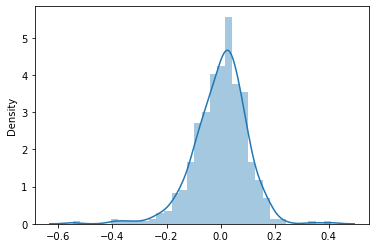

In [208]:
res = y_train - y_train_pred
sns.distplot(res)

# Prediction and Evaluation on the test set 

In [209]:
# Create a list of numeric variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#2. fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
184,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [210]:
X_test_sm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'Saturday', 'WS2', 'WS3',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec'],
      dtype='object')

In [211]:
X.columns

Index(['yr', 'workingday', 'windspeed', 'Saturday', 'WS2', 'WS3', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [212]:
y_test = df_test.pop("cnt")
X_test = df_test

In [213]:
# add a constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
184,1.0,0,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,1.0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [214]:
X_test_sm = X_test_sm.drop(['temp','atemp', 'hum','summer','fall', 'winter','holiday','Monday','Tuesday', 'Wednesday','Thursday','Friday'],axis = 1)

In [215]:
#Prediction
y_test_pred = lr_model.predict(X_test_sm)

In [216]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7654654151272171